# Resolver problemas termodinámicos

# PROGRAMA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import pint
import sympy
sympy.init_printing()
%matplotlib notebook

#Se importan las librerias a usar

In [2]:
#Se importa el archivo excel con las tablas termodinámicas
tablasAire=pd.ExcelFile('TablasAire.xlsx')

In [3]:
aireSI=pd.read_excel(tablasAire,sheet_name=0)
aireSI
#Index_col=0 hace que la tabla tenga de index a la columna Temperatura(K)

,Temperatura(K),Cp(kJ/kmol*K),h(kJ/kmol),s(kJ/kmol*K),Pr
0,210,29.145,-2683.3,183.799,0.3987
1,220,29.125,-2391.9,185.155,0.4693
2,230,29.110,-2100.7,186.449,0.5483
3,240,29.099,-1809.7,187.688,0.6364
4,250,29.091,-1518.7,188.875,0.7342
...,...,...,...,...,...
240,2610,37.101,78853.5,264.693,6699.0000
241,2620,37.111,79222.5,264.833,6814.0000
242,2630,37.122,79593.7,264.974,6931.0000
243,2640,37.132,79965.0,265.115,7049.0000


In [4]:
aireING=pd.read_excel(tablasAire,sheet_name=1)
aireING

,Temperatura(R),Cp(Btu/mol*R),h(Btu/mol),s(Btu/mol*R),Pr
0,390,6.963,-1070.8,44.147,0.4449
1,400,6.960,-1001.2,44.323,0.4861
2,410,6.958,-931.6,44.495,0.5300
3,420,6.956,-862.0,44.663,0.5767
4,430,6.955,-792.5,44.826,0.6262
...,...,...,...,...,...
237,4820,8.884,35005.6,63.490,7511.0000
238,4840,8.887,35183.4,63.527,7652.0000
239,4860,8.889,35361.1,63.564,7794.0000
240,4880,8.892,35538.9,63.600,7939.0000


In [5]:
#Cambiar la columna indice ahora a temperatura
aireINGt=aireING.set_index('Temperatura(R)')
aireSIt=aireSI.set_index('Temperatura(K)')
aireINGt

,Cp(Btu/mol*R),h(Btu/mol),s(Btu/mol*R),Pr
Temperatura(R),,,,
390,6.963,-1070.8,44.147,0.4449
400,6.960,-1001.2,44.323,0.4861
410,6.958,-931.6,44.495,0.5300
420,6.956,-862.0,44.663,0.5767
430,6.955,-792.5,44.826,0.6262
...,...,...,...,...
4820,8.884,35005.6,63.490,7511.0000
4840,8.887,35183.4,63.527,7652.0000
4860,8.889,35361.1,63.564,7794.0000


In [6]:
#Cambiar la columna indice ahora a Cp
aireINGcp=aireING.set_index('Cp(Btu/mol*R)')
aireSIcp=aireSI.set_index('Cp(kJ/kmol*K)')
aireINGcp

,Temperatura(R),h(Btu/mol),s(Btu/mol*R),Pr
Cp(Btu/mol*R),,,,
6.963,390,-1070.8,44.147,0.4449
6.960,400,-1001.2,44.323,0.4861
6.958,410,-931.6,44.495,0.5300
6.956,420,-862.0,44.663,0.5767
6.955,430,-792.5,44.826,0.6262
...,...,...,...,...
8.884,4820,35005.6,63.490,7511.0000
8.887,4840,35183.4,63.527,7652.0000
8.889,4860,35361.1,63.564,7794.0000


In [7]:
#Cambiar la columna indice ahora a h
aireINGh=aireING.set_index('h(Btu/mol)')
aireSIh=aireSI.set_index('h(kJ/kmol)')
aireINGh

,Temperatura(R),Cp(Btu/mol*R),s(Btu/mol*R),Pr
h(Btu/mol),,,,
-1070.8,390,6.963,44.147,0.4449
-1001.2,400,6.960,44.323,0.4861
-931.6,410,6.958,44.495,0.5300
-862.0,420,6.956,44.663,0.5767
-792.5,430,6.955,44.826,0.6262
...,...,...,...,...
35005.6,4820,8.884,63.490,7511.0000
35183.4,4840,8.887,63.527,7652.0000
35361.1,4860,8.889,63.564,7794.0000


In [8]:
#Cambiar la columna indice ahora a s
aireINGs=aireING.set_index('s(Btu/mol*R)')
aireSIs=aireSI.set_index('s(kJ/kmol*K)')
aireSIs

,Temperatura(K),Cp(kJ/kmol*K),h(kJ/kmol),Pr
s(kJ/kmol*K),,,,
183.799,210,29.145,-2683.3,0.3987
185.155,220,29.125,-2391.9,0.4693
186.449,230,29.110,-2100.7,0.5483
187.688,240,29.099,-1809.7,0.6364
188.875,250,29.091,-1518.7,0.7342
...,...,...,...,...
264.693,2610,37.101,78853.5,6699.0000
264.833,2620,37.111,79222.5,6814.0000
264.974,2630,37.122,79593.7,6931.0000


In [9]:
#Cambiar la columna indice ahora a Pr
aireINGpr=aireING.set_index('Pr')
aireSIpr=aireSI.set_index('Pr')
aireINGpr

,Temperatura(R),Cp(Btu/mol*R),h(Btu/mol),s(Btu/mol*R)
Pr,,,,
0.4449,390,6.963,-1070.8,44.147
0.4861,400,6.960,-1001.2,44.323
0.5300,410,6.958,-931.6,44.495
0.5767,420,6.956,-862.0,44.663
0.6262,430,6.955,-792.5,44.826
...,...,...,...,...
7511.0000,4820,8.884,35005.6,63.490
7652.0000,4840,8.887,35183.4,63.527
7794.0000,4860,8.889,35361.1,63.564


In [10]:
#Diccionarios y listas globales para cambiar string de mol a lb o kg
dictLb={"Cp(Btu/mol*R)":"Cp(Btu/lb*R)","h(Btu/mol)":"h(Btu/lb)","s(Btu/mol*R)":"s(Btu/lb*R)"} #La masa son libras para sistemaIn
dictGr={'Cp(kJ/kmol*K)':"Cp(kJ/kg*K)", 'h(kJ/kmol)':"h(kJ/kg)", 's(kJ/kmol*K)':"s(kJ/kg*K)"} #La masa son gramos
listConvLb=["Cp(Btu/mol*R)","h(Btu/mol)","s(Btu/mol*R)"] #Columnas que conllevan el valor mol y cambiaran el valor al convertir
listConvGr=['Cp(kJ/kmol*K)', 'h(kJ/kmol)', 's(kJ/kmol*K)']

## CONVERSIÓN DE UNIDADES ---------------------------------------------------------------------------------------

In [11]:
#u=pint.UnitRegistry() #Registrará las unidades 
#Q=u.Quantity #Cantidades
#aireSecoMolSI=28.9647*u('g/mol') #1 mol de aire seco equivale a 28.9647gramos
#aireSecoMolING=28.9647*u('lb/mol') #1 mol de aire seco equivale a 28.9647libras
#u.default_format = "~P" #Para que se vean las unidades "pretty"
aireSecoMol=28.9647

## FIN DE CONVERSIÓN DE UNIDADES -----------------------------------------------------------------------------

## FUNCIONES RAÍZ -------------------------------------------------------------------------------------------------------
Funciones raíz son las funciones que son independientes, pero muy importantes para las demás funciones complemento

In [12]:
#Definir función que me permita obtener indices anterior y posterior al valor ingresado
def IndexCercanos (val,df):
    """Definir función que me permita obtener indices anterior y posterior al valor ingresado
    val = valor anterior y posterior a buscar en el indice
    df = Nombre de la tabla a buscar"""
    
    if val not in df.index: #Buscara si el valor no está en el dataframe
        indexCercan1=df.index.get_indexer([val],method='ffill') #Valor anterior
        indexCercan2=df.index.get_indexer([val],method='bfill') #Valor posterior
        indexCercano=np.append(indexCercan1,[indexCercan2,indexCercan2+1]) #+1 porque cuando el nuevo valor de temperatura se agregue, obtendra el valor de indexCercanos2
    else: #Si el valor se encuentra en el index
        indexCercan1=df.index.get_indexer([val]) #Array con posición exacta del index
        indexCercano=np.append(indexCercan1,[indexCercan1-1,indexCercan1+1]) #Array con un valor menos y un valor más
        indexCercano=np.sort(indexCercano) #Organizar array
    return indexCercano
    

In [13]:
#Definir función que me permita llamar alguna tabla termodinamica con el indice deseado
def TablaTermodinamica(nombreTabla,n,cp=0):
    """Función que me permite usar en cualquier función que se dedique a encontrar valores termodinámicos
    nombreTabla=Nombre de la tabla a llamar
    n=propiedad extensiva PE. temperatura, entalpia, entropia, Pr PERO NO CP ya que no es monotonica
    cp=0 P.E cp=1 hace que se adapte para las cp
    mass='mol' por defecto
    mass='lb'
    mass='kg'"""
    

    #tablasMol=np.array(['Temperatura(R)', 'Cp(Btu/mol*R)', 'h(Btu/mol)', 's(Btu/mol*R)', 'Pr'])
    #nombreTabla=nombreTabla.set_axis(tablasMol,axis="Columns",copy=False)
    n=float(n)
    if cp==0:
        indexes=IndexCercanos(n,nombreTabla) #Valor para localizar el indice anterior y posterior al valor de n
        if n not in nombreTabla.index: #Busca que el valor de n no exista, si existe entonces se salta lo que lleva sangria
            nombreTabla.loc[n]=[np.NaN,np.NaN,np.NaN,np.NaN] #Se crea una fila con la n sin valores
            nombreTabla=nombreTabla.sort_index() #Se ordena basandose en su posición n
            nombreTabla=nombreTabla.interpolate(method='slinear') #Se interpola los valores NaN
            nombreTabla=nombreTabla.interpolate(method="slinear",fill_value="extrapolate",limit_direction="both")
            #print(nombreTabla.iloc[indexes])
        return nombreTabla,nombreTabla.iloc[indexes]
    else:
        if n not in nombreTabla.index:
            nombreTabla.loc[n]=[np.NaN,np.NaN,np.NaN,np.NaN]
            nombreTabla=nombreTabla.sort_index()
            nombreTabla=nombreTabla.interpolate(method='slinear')
        return nombreTabla,nombreTabla.loc[n]

    """elif mass =="lb":
        tablasLb=np.array(['Temperatura(R)','Cp(Btu/lb*R)','h(Btu/lb)','s(Btu/lb*R)','Pr'])
        nombreTabla
        nombreTabla=nombreTabla.set_axis(tablasLb,axis="Columns", copy=True)
        
        if cp==0:
            
        else:
            
        
    elif mass =="kg":
        tablasKg=np.array(['Temperatura(K)', 'Cp(kJ/kg*K)', 'h(kJ/kg)', 's(kJ/kg*K)', 'Pr'])
        nombreTabla=nombreTabla.set_axis(tablasKg,axis="Columns", copy=True)
        
        if cp==0:
            
        else:
    """ 
    
    

## FIN DE FUNCIONES RAÍZ ---------------------------------------------------------------------------------------------

## FUNCIONES COMPLEMENTO ---------------------------------------------------------------------------------------
Las funciones complemento son funciones dependientes a las raíz, necesitan de las funciones raíz para funcionar

### FUNCIONES BASADOS EN SISITEMA INGLÉS --------------------------------------------------------------------------------------------

In [14]:
def TemperaturaING(TR):
    """Valores termodinámicos en función de su temperatura Rankine
    TR = RANKINE"""
    global aireINGt
#   Se declara la variable global aireINGt para ser modificada globalmente
    aireINGt,tablaIndex = TablaTermodinamica(aireINGt,TR)
#   Debido que la función TablaTermodinamica retorna 2 valores, se les asigna el valor del primero, que
#es la modificación global de la tabla del aire con valores de temperatura para que la interpolación se agregue.
#La otra es una tabla visual para que al pedir un valor a la tablatermodinamica se pueda visualizar la interpolación
    return tablaIndex
#La tabla será lo único que se podrá visualizar al llamar a la función, esto se repite para las demás funciones

def TemperaturaINGLb(TR):
    """Valores termodinámicos en función de su temperatura Rankine y con valores de libras en lugar de mol
    TR = RANKINE"""
    global dictLb,listConvLb,aireSecoMolING
#   Aquí no es necesario asignar globalmente todas las librerias, pero aún así lo hice
    tablaIndex = TemperaturaING(TR).copy()
    #Genero una copia de la tabla entregada en la función de TemperarutaING
        #tablaIndex.loc[:,listConvLb] = tablaIndex.loc[:,listConvLb]/aireSecoMol Forma anticuada
    tablaIndex.loc[:,listConvLb]/=aireSecoMol
    #Asigno a la variable tablaIndex que sus valores se dividan sobre la conversión de aire seco
    tablaIndex = tablaIndex.rename(dictLb,axis=1)
    #Le agrego el nombre a las columnas que había ya asignado en un diccionario anteriormente
    return tablaIndex
    
    
    


In [15]:
#Valores termodinámicos en función de Cp Inglesas
def CpING(CP):
    """Valores termodinámicos en función de Cp Inglesas
    CP = Capacidad calorifica en Btu/mol*R"""
    global aireINGcp
#   Se declara la variable global aireINGt para ser modificada globalmente
    aireINGcp,tablaIndex = TablaTermodinamica(aireINGcp,CP,cp=1) #Series
    return tablaIndex

def CpINGLb(CP):
    """Valores termodinamicos en función de Cp inglesas con masa = Lb
    CP = Capacidad calorifica en Btu/lb*R"""
    global dictLb,listConvLb,aireSecoMolING
    CP=CP*aireSecoMol
    #Se convierten el CP ingresado a valores de CP en función de mol
    tablaIndex = CpING(CP).copy()
    #Explicado en def TemperaturaINGLb(TR)
    tablaIndex = tablaIndex.set_axis(['Temperatura(R)','h(Btu/lb)','s(Btu/lb*R)','Pr'])
    #Se cambia el nombre del eje debido a que esta función es Serie en lugar de DataFrame
    tablaIndex.loc[['h(Btu/lb)','s(Btu/lb*R)']] /= aireSecoMol
    #Explicado en def TemperaturaINGLb(TR)
    return tablaIndex
    """Valores termodinámicos en función de Cp inglesas y con valores de libras en lugar de mol
    CP= Capacidad calorifica en Btu/lb*R"""
    #TablaTermodinamica(aireINGcp,CP,cp=1,mass="lb")
    

In [16]:
#Valores termodinámicos en función de entalpia (h) Inglesas
def EntalpiaING(H):
    """Valores termodinámicos en función de entalpía(h) inglesas
    H = entalpía (Btu/mol)"""
    global aireINGh
    aireINGh,tablaIndex = TablaTermodinamica(aireINGh,H) 
    return tablaIndex
#Explicado en def TemperaturaING(TR) 

def EntalpiaINGLb(H):
    """Valores termodinámicos en función de entalpia(h) inglesas y con valores de libras en lugar de mol
    H = Entalpía (Btu/lb)"""
    global dictLb
    #Aquí ya me di cuenta que no era necesario ninguna variable global ya que no serán modificadas, solo llamadas
    H=H*aireSecoMol
    #Explicado en def TemperaturaINGLb(TR)
    tablaIndex = EntalpiaING(H).copy()
    #Explicado en def TemperaturaINGLb(TR)
    tablaIndex.reset_index(inplace=True)
    #La columna que esta sirviendo como indice (entalpia) se regresa en forma de columna para que se pueda dividir y cambiar
    #nombre
    tablaIndex.loc[:,listConvLb]/=aireSecoMol
    #Explicado en def TemperaturaINGLb(TR)
    tablaIndex = tablaIndex.rename(dictLb,axis=1)
    #Explicado en def TemperaturaINGLb(TR)
    tablaIndex.set_index('h(Btu/lb)',inplace=True)
    #Regresa la columna (entalpia) a ser el indice de la tabla
    return tablaIndex
    

In [17]:
#Valores termodinámicos en función de entropia (s) Inglesas
def EntropiaING(S):
    """Valores termodinámicos en función de entropia(s) inglesas
    S = entropía (Btu/mol*R)"""
    global aireINGs
    aireINGs,tablaIndex = TablaTermodinamica(aireINGs,S)
    return tablaIndex
#Explicado en def TemperaturaING(TR)

def EntropiaINGLb(S):
    """Valores termodinámicos en función de entropia(s) inglesas y con valores de libras en lugar de mol
    S = entropía (Btu/lb*R)"""
    
    global dictLb
    S=S*aireSecoMol
    tablaIndex = EntropiaING(S).copy()
    tablaIndex.reset_index(inplace=True)
    tablaIndex.loc[:,listConvLb]/=aireSecoMol
    tablaIndex = tablaIndex.rename(dictLb,axis=1)
    tablaIndex.set_index('s(Btu/lb*R)',inplace=True)
    return tablaIndex
#Explicado en def TemperaturaINGLb(TR) y EntalpiaINGLb(H)
    

In [18]:
#Valores termodinámicos en función de su presion relativa (Pr) Inglesas
def PresionRelING(PR):
    """Valores termodinámicos en función de su presión relativa(Pr) inglesas
    PR = presión relativa"""
    global aireINGpr
    aireINGpr,tablaIndex = TablaTermodinamica(aireINGpr,PR)
    return tablaIndex
#Explicado en def TemperaturaING(TR)

def PresionRelINGLb(PR):
    """Valores termodinamicos en función de su presión relativa(Pr) inglesas y con valores de libras en lugar de mol
    PR = Presión relativa"""
    global dictLb
    tablaIndex = PresionRelING(PR).copy()
    tablaIndex.loc[:,listConvLb]/=aireSecoMol
    tablaIndex = tablaIndex.rename(dictLb,axis=1)
    return tablaIndex
#Explicado en def TemperaturaINGLb(TR) y EntalpiaINGLb(H)
    

### FIN DE FUNCIONES BASADO EN EL SISTEMA INGLÉS -------------------------------------------------------------------------------

### FUNCIONES BASADO EN EL SISTEMA INTERNACIONAL (SI) -----------------------------------------------------------------------

In [19]:
#valores termodinámicos en función de su temperatura SI
def TemperaturaSI(TK):
    """Valores termodinámicos en función de su temperatura kelvin
    TK = Temperatura kelvin"""
    global aireSIt
    aireSIt,tablaIndex =  TablaTermodinamica(aireSIt,TK)
    return tablaIndex
#Explicado en def TemperaturaING(TR)

def TemperaturaSIKg(TK):
    """Valores termodinamicos en función de su temperatura Kelvin
    Y entrega valores de masa=kg
    TK = Temperatura Kelvin"""
    global dictGr,listConvGr,aireSecoMolSI
    tablaIndex = TemperaturaSI(TK).copy()
    tablaIndex.loc[:,listConvGr]/=aireSecoMol
    tablaIndex = tablaIndex.rename(dictGr,axis=1)
#Explicado en def TemperaturaINGLb(TR)
        
    return tablaIndex

In [20]:
#Valores termodinámicos en función de Cp SI
def CpSI(CP):
    """Valores termodinámicos en función de Cp SI
    CP = Capacidad calorifica en (kJ/kmol*K)"""
    global aireSIcp
    aireSIcp,tablaIndex = TablaTermodinamica(aireSIcp,CP,cp=1)
    return tablaIndex
#Explicado en def TemperaturaING(TR)

def CpSIKg(CP):
    global dictGr
    """Valores termodinamicos en función de Cp SI, kg en lugar de mol
    CP = Capacidad calorifica en (kJ/kg*K)"""
    global dictLb,listConvLb,aireSecoMolING
    CP=CP*aireSecoMol
    tablaIndex = CpSI(CP).copy()
    tablaIndex = tablaIndex.set_axis(['Temperatura(K)','h(kJ/kg)','s(kJ/kg*R)','Pr'])
    tablaIndex.loc[['h(kJ/kg)','s(kJ/kg*R)']] /= aireSecoMol
    return tablaIndex
    #Explicado en def CpINGLb(CP)
    

In [21]:
#Valores termodinámicos en función de entalpia (h) SI
def EntalpiaSI(H):
    """Valores termodinámicos en función de entalpía(h) SI
    H = entalpía (kJ/kmol)"""
    global aireSIh
    aireSIh, tablaIndex = TablaTermodinamica(aireSIh,H)
    return tablaIndex
#Explicado en def TemperaturaING(TR)

def EntalpiaSIKg(H):
    global dictGr
    """Valores termodinamicos en función de entalpía(h) SI, kg en lugar de mol
    H = entalpía (kJ/kg)"""
    global dictLb
    H=H*aireSecoMol
    tablaIndex = EntalpiaSI(H).copy()
    tablaIndex.reset_index(inplace=True)
    tablaIndex.loc[:,listConvGr]/=aireSecoMol
    tablaIndex = tablaIndex.rename(dictGr,axis=1)
    tablaIndex.set_index('h(kJ/kg)',inplace=True)
    return tablaIndex
    #Explicado en def TemperaturaINGLb(TR) y EntalpiaINGLb(H)

In [22]:
#Valores termodinámicos en función de entropia (s) SI
def EntropiaSI(S):
    """Valores termodinámicos en función de entropia(s) SI
    S = entropía (kJ/kmol*K)"""
    global aireSIs
    aireSIs, tablaIndex = TablaTermodinamica(aireSIs,S)
    return tablaIndex
#Explicado en def TemperaturaING(TR)

def EntropiaSIKg(S):
    global dictGr
    """Valores termodinámicos en función de entropia(s) SI, kg en lugar de mol
    S = entropía (kJ/kg*K)"""
    global dictLb
    S=S*aireSecoMol
    tablaIndex = EntropiaSI(S).copy()
    tablaIndex.reset_index(inplace=True)
    tablaIndex.loc[:,listConvGr]/=aireSecoMol
    tablaIndex = tablaIndex.rename(dictGr,axis=1)
    tablaIndex.set_index('s(kJ/kg*K)',inplace=True)
    return tablaIndex
#Explicado en def TemperaturaINGLb(TR) y EntalpiaINGLb(H)

In [23]:
#Valores termodinámicos en función de su presion relativa (Pr) SI
def PresionRelSI(PR):
    """Valores termodinámicos en función de su presión relativa(Pr) inglesas
    PR = presión relativa"""
    global aireSIpr
    aireSIpr, tablaIndex = TablaTermodinamica(aireSIpr,PR)
    return tablaIndex
#Explicado en def TemperaturaING(TR)

def PresionRelSIKg(PR):
    global dictGr
    """Valores termodinámicos en función de su presión relativa(Pr) inglesas, kg en lugar de mol
    PR = presión relativa"""
    global dictLb
    tablaIndex = PresionRelSI(PR).copy()
    tablaIndex.loc[:,listConvGr]/=aireSecoMol
    tablaIndex = tablaIndex.rename(dictGr,axis=1)
    return tablaIndex
#Explicado en def TemperaturaINGLb(TR) y EntalpiaINGLb(H)

### FIN DE FUNCIONES BASADOS EN EL SISTEMA INTERNACIONAL (SI) ----------------------------------------------------------

## FIN DE FUNCIONES COMPLEMENTO ----------------------------------------------------------------------------

## INTERPOLACIONES ----------------------------------------------------------------------------------------------------

In [24]:
#TemperaturaING(3025)


In [25]:
#TemperaturaINGLb(3026.5)

In [26]:
#TemperaturaSI(2005.5)

In [27]:
#TemperaturaSIKg(4900)

In [28]:
# CpING(7.25)

In [29]:
# CpINGLb(0.25)

In [30]:
# CpSI(36.2)

In [31]:
# CpSIKg(1.25)

In [32]:
# EntalpiaING(20160.2)

In [33]:
# EntalpiaINGLb(700)


In [34]:
# EntalpiaSI(56455)

In [35]:
# EntalpiaSIKg(1900)

In [36]:
# EntropiaING(62)

In [37]:
# EntropiaINGLb(2.14)

In [38]:
# EntropiaSI(200)

In [39]:
# EntropiaSIKg(8.78)

In [40]:
# PresionRelING(2387)

In [41]:
# PresionRelINGLb(2331.7)

In [42]:
# PresionRelSI(5000)

In [43]:
# PresionRelSIKg(37.575)

## FIN DE INTERPOLACIONES -----------------------------------------------------------------------------------------

## FUNCIONES PARA CP VARIABLES ------------------------------------------------------------

In [44]:
#Función para definir el trabajo del compresor
def trabajoCompresor(h1,h2):
    """El trabajo de compresor es h2-h1
    P.E
    trabajoCompresor(51,21)
    Puede ser con entalpía especifica/molar o entalpía total"""
    return h2-h1

#Función para definir el calor de entrada
def calorEntrada(h2,h3):
    """El calor de entrada es h3-h2
    P.E
    calorEntrada(51,21)
    Puede ser con entalpía especifica/molar o entalpía total"""
    return h3-h2

#Función para definir el trabjo de turbinas
def trabajoTurbina(h3,h4):
    """El trabajo de turbina es h3-h4
    P.E
    trabajoTurbina(51,21)
    Puede ser con entalpía especifica/molar o entalpía total"""
    return h3-h4

#Función para definir el calor de salida
def calorSalida(h1,h4):
    """El calor de salida es h4-h1
    P.E
    calorSalida(51,21)
    Puede ser con entalpía especifica/molar o entalpía total"""
    return h4-h1

#Función para definir el trabajo neto
def trabajoNeto(h1=None,h2=None,h3=None,h4=None,trabTurbina=0,trabCompresor=0):
    """El trabajo neto se puede sacar de 2 formas
    - Asignando todos los valores de entalpia(h1,h2,h3,h4)
    - Asignando valores de trabajo de turbina y compresor
    P.E
    - trabajoNeto(15.4,12.5,15.7,18.6) son con los 4 valores de entalpia
    - trabajoNeto(trabTurbina=150, trabCompresor=130)
    Energías
    - Puede ser con entalpía especifica/molar o entalpía total
    - Pueden ser energía especifica/molar o energía total"""
    
    if trabTurbina and trabCompresor != 0:
        return trabTurbina-trabCompresor
    if (trabTurbina !=0 and trabCompresor==0) or (trabTurbina==0 and trabCompresor!=0):
        raise Exception("La turbina o el compresor no se les agregó trabajo en los argumentos")
    if (h1 is None) or (h2 is None) or (h3 is None) or (h4 is None):
        raise Exception("Falta una variable de entalpia")
    if h1 and h2 and h3 and h4 is not None:
        return h3-h4-(h2-h1)
    raise Exception("Los argumentos son invalidos")

#Función para definir la eficiencia térmica
def eficienciaTermica(trabNeto,calEntrada):
    """La eficiencia térmica del ciclo es trabajoNeto/calorEntrada
    Útil para Cp variable
    Puede ser con energía especifica/molar o energía total"""
    return trabNeto/calEntrada


    
    
    

In [45]:
def formulasRelacionPresiones ():
    PR1,PR2,PR3,PR4,P1,P2,P3,P4,RP=sympy.symbols("Pr_1 Pr_2 Pr_3 Pr_4 P_1 P_2 P_3 P_4 r_p",real=True)
    eq1=sympy.Eq(PR2/PR1,P2/P1)
    eq2=sympy.Eq(PR3/PR4,P3/P4)
    eq3=sympy.Eq(PR2/PR1,RP)
    eq4=sympy.Eq(PR3/PR4,RP)
    eq5=sympy.Eq(RP,P2/P1)
    eq6=sympy.Eq(RP,P3/P4)
    
    return list([eq1,eq2,eq3,eq4])

In [46]:
formulasRelacionPresiones()

## CICLO BÁSICO CON FRICCIÓN (AIRE ESTÁNDAR)----------------------------------------------------------

In [47]:
def eficienciaCompresor(eficCompresor,h1,h2i=None,h2r=None,):
    """Se entrega el valor de la entalpia 2 real del compresor o de la ideal
    Se hace un despeje de h2r de la formula (h2i-h1)/(h2r-h1)
    Si metes una entalpia real despejará la entalpia ideal
    Si metes una entapia ideal despejará la entalpia real"""
    H1,H2I,EFCOMP,H2R=sympy.symbols("h_1 h_2i n_comp h_2r",real=True)
    eC=sympy.Eq(EFCOMP,(H2I-H1)/(H2R-H1))
    eC=eC.subs(H1,h1).subs(H2I,h2i).subs(EFCOMP,eficCompresor).subs(H2R,h2r)
    h2roi=sympy.solve(eC)[0]
    return float(h2roi)
    

    

In [48]:
def eficienciaTurbina(eficTurbina,h3,h4i=None,h4r=None):
    """Se entrega el valor de la entalpía 4 real de la turbina o de la ideal
    Se hace el despeje h2r de la formula (h3-h4r)/(h3-h4i)
    Si metes una entalpia real despejará la entalpia ideal
    Si metes una entalpia ideal despejará la entalpia real
    ES PREFRERIBLE USAR LA FUNCIÓN eficienciaTurbinaGas ya que es mejor"""
    H3,H4I,EFTURB,H4R=sympy.symbols("h_3 h_4i n_turb h_4r",real=True)
    eT=sympy.Eq(EFTURB,(H3-H4R)/(H3-H4I))
    eT=eT.subs(H3,h3).subs(H4I,h4i).subs(EFTURB,eficTurbina).subs(H4R,h4r)
    h4roi=sympy.solve(eT)[0]
    return float(h4roi)

In [49]:
def eficienciaTurbinaGas(eficTurbinaGas,h3,h4i=None,h4r=None):
    """Se entrega el valor de la entalpia 4 real de la turbina o de la ideal
    Se hace el despeje h2r o h2i, depende del valor que se metió
    La formula es (h3-h4r)/(h3-h4i)
    Si metes una entalpia real despejará la entalpia ideal
    Si metes una entalpia ideal despejará la entalpia real"""
    H3,H4I,EFTURB,H4R=sympy.symbols("h_3 h_4i n_turb h_4r", real=True)
    eT=sympy.Eq(EFTURB,(H3-H4R)/(H3-H4I))
    eT=eT.subs(H3,h3).subs(H4I,h4i).subs(EFTURB,eficTurbinaGas).subs(H4R,h4r)
    h4roi=sympy.solve(eT)[0]
    return float(h4roi)

In [50]:
def eficienciaTurbinaPotencia(eficTurbinaPotencia,h4r,h5i=None,h5r=None):
    """Se entrega el valor de la entalpia 5 real de la turbina o de la ideal
    Se hace el despeje h5r o h5i, depende del valor que se metió
    La formula es (h4r-h5r)/(h4r-h5i)
    Si metes una entalpia real despejará la entalpia ideal
    SI metes una entalpia ideal despejará la entalpia real"""
    H4R,H5I,EFTURB,H5R=sympy.symbols("h_4r h_5i n_turb h_5r", real=True)
    eT=sympy.Eq(EFTURB,(H4R-H5R)/(H4R-H5I))
    eT=eT.subs(H4R,h4r).subs(H5I,h5i).subs(EFTURB,eficTurbinaPotencia).subs(H5R,h5r)
    h4roi=sympy.solve(eT)[0]
    return float(h4roi)
    

In [51]:
# eficienciaTurbinaGas(eficTurbinaGas=0.89,h3=35128.8,h4r=25193.2457597701)

In [52]:
# eficienciaTurbina(35128.8,23965.2559098541,0.89)

In [53]:
def formulasFriccion():
    NT,NC,WTGR,WTGI,WTPR,WTPI,WCR,WCI=sympy.symbols("eta_t eta_c w_TGr w_TGi w_TPr w_TPi w_Cr w_Ci", real=True)
    H1,H2I,H3,H4I,H5I,H2R,H5R, H4R=sympy.symbols("h_1 h_2i h_3 h_4i h_5i h_2r h_5r h_4r", real=True)
    PR1,PR2I,PR2R,PR3,PR4I,PR4R,PR5I,PR5R,RP=sympy.symbols("p_r1 p_r2i p_r2r p_r3 p_r4i p_r4r p_r5i p_r5r r_p",real=True)
    eq1=sympy.Eq(NC,WCI/WCR)
    eq2=sympy.Eq(NC,(H2I-H1)/(H2R-H1))
    eq3=sympy.Eq(NT,WTGR/WTGI)
    eq4=sympy.Eq(NT,(H3-H4R)/(H3-H4I))
    eq5=sympy.Eq(NT,WTPR/WTPI)
    eq6=sympy.Eq(NT,(H4R-H5R)/(H4R-H5I))
    
    return list([eq1,eq2,eq3,eq4,eq5,eq6])
    

In [54]:
def formulasFriccionPresiones():
    PR1,PR2I,PR2R,PR3,PR4I,PR4R,PR5I,PR5R,RP=sympy.symbols("p_r1 p_r2i p_r2r p_r3 p_r4i p_r4r p_r5i p_r5r r_p",real=True)
    P1,P2,P3,P4,P5=sympy.symbols("p_1 p_2 p_3 p_4 p_5")
    eq1=sympy.Eq(RP, PR2I/PR1)
    eq2=sympy.Eq(P2/P1,PR2I/PR1)
    eq3=sympy.Eq(P3/P4,PR3/PR4I)
    eq4=sympy.Eq(P4/P5,PR4R/PR5I)
    
    return list([eq1,eq2,eq3,eq4])

In [55]:
# formulasFriccionPresiones()

## FIN CICLO BÁSICO CON FRICCIÓN (AIRE ESTÁNDAR) ---------------------------------------------------

In [56]:
# PR1,PR2,PR3,PR4,P1,P2,P3,P4,RP=sympy.symbols("Pr_1 Pr_2 Pr_3 Pr_4 P_1 P_2 P_3 P_4 r_p",real=True)
# eq1=sympy.Eq(PR2/PR1,P2/P1)
# eq2=sympy.Eq(PR3/PR4,P3/P4)
# eq3=sympy.Eq(PR2/PR1,RP)
# eq4=sympy.Eq(PR3/PR4,RP)
# eq3=eq3.subs(RP,15.88).subs(PR2,19.20686).subs(PR3,None)
# sympy.solve(eq3)[0]

# # list([eq1,eq2])

In [57]:
def gasesIdeales():
    empty

## FIN DE FUNCIONES PARA CP VARIABLES ---------------------------------------------------------------------

## VALORES PARA CP CONSTANTE ---------------------------------------------------------------------------------

In [58]:
# LAS MISMAS FUNCIONES QUE LAS DE ARRIBA PERO PARA CP CONSTANTES
def trabajoCompresorCpCon(T1,T2,cp):
    """El trabajo de compresor es cp(T2-T1)
    
    Unidades
    Si CP[=]kJ/kg*K entonces T1 [=]K, T2[=]K y la función entrega energía especifica[=]kJ/kg
    Si CP[=]BTU/lb*R entonces T1[=]R, T2[=]R y la función entrega energía especifica[=]BTU/lb
    
    Si CP[=]kJ/kmol*K entonces T1[=]K, T2[=]K y la función entrega energía especifica[=]kJ/kmol
    Si CP[=]BTU/mol*K entonces T1[=]K, T2[=]K y la función entrega energía especifica[=]BTU/mol"""
    return cp*(T2-T1)

def calorEntradaCpCon(T2,T3,cp):
    """El calor de entrada es cp(T3-T2)
    
    Unidades
    Si CP[=]kJ/kg*K entonces T1 [=]K, T2[=]K y la función entrega energía especifica[=]kJ/kg
    Si CP[=]BTU/lb*R entonces T1[=]R, T2[=]R y la función entrega energía especifica[=]BTU/lb
    
    Si CP[=]kJ/kmol*K entonces T1[=]K, T2[=]K y la función entrega energía especifica[=]kJ/kmol
    Si CP[=]BTU/mol*K entonces T1[=]K, T2[=]K y la función entrega energía especifica[=]BTU/mol"""
    return cp*(T3-T2)
    
def trabajoTurbinaCpCon(T3,T4,cp):
    """El trabajo de turbina es cp(T3-T4)
    
    Unidades
    Si CP[=]kJ/kg*K entonces T1 [=]K, T2[=]K y la función entrega energía especifica[=]kJ/kg
    Si CP[=]BTU/lb*R entonces T1[=]R, T2[=]R y la función entrega energía especifica[=]BTU/lb
    
    Si CP[=]kJ/kmol*K entonces T1[=]K, T2[=]K y la función entrega energía especifica[=]kJ/kmol
    Si CP[=]BTU/mol*K entonces T1[=]K, T2[=]K y la función entrega energía especifica[=]BTU/mol"""
    return cp*(T3-T4)

def calorSalidaCpCon(T1,T4,cp):
    """El calor de salida es cp(T4-T1)
    
    Unidades
    Si CP[=]kJ/kg*K entonces T1 [=]K, T2[=]K y la función entrega energía especifica[=]kJ/kg
    Si CP[=]BTU/lb*R entonces T1[=]R, T2[=]R y la función entrega energía especifica[=]BTU/lb
    
    Si CP[=]kJ/kmol*K entonces T1[=]K, T2[=]K y la función entrega energía especifica[=]kJ/kmol
    Si CP[=]BTU/mol*K entonces T1[=]K, T2[=]K y la función entrega energía especifica[=]BTU/mol"""
    return cp*(T4-T1)

def trabajoNetoCpCon(T1,T2,T3,cp,T4=None):
    """El trabajo neto
    No es necesario tener un valor de T4, con las 3 temperaturas se puede realizar
    Si detecta un valor de T4 utilizará la formula convencional con todas las temperaturas involucradas
    
    Unidades
    Si CP[=]kJ/kg*K entonces T1 [=]K, T2[=]K y la función entrega energía especifica[=]kJ/kg
    Si CP[=]BTU/lb*R entonces T1[=]R, T2[=]R y la función entrega energía especifica[=]BTU/lb
    
    Si CP[=]kJ/kmol*K entonces T1[=]K, T2[=]K y la función entrega energía especifica[=]kJ/kmol
    Si CP[=]BTU/mol*K entonces T1[=]K, T2[=]K y la función entrega energía especifica[=]BTU/mol"""
    if T4 is None:
        return cp*(T3+T1-T2-(T3*T1/T2))
    if T4 is not None:
        return cp*(T3+T1-T2-T4)

def temperatura2TrabMax(T1,T3):
    """Temperatura 2 para trabajo máximo
    
    Unidades
    Si T1[=]K entonces T3[=]K o viceversa
    Si T1[=]R entonces T3[=]R o viceversa
    La función entrega un valor de temperatura"""
    return (T1*T3)**(1/2)

def temperatura4(T1,T2,T3):
    """Temperatura 4
    
    Unidades
    T1[=]T2[=]T3[=]K
    T1[=]T2[=]T3[=]R"""
    return (T3*T1)/T2
    
def eficienciaTermicaCpCon(T1,T2,T3,T4):
    """La eficiencia térmica del ciclo es
    1-(T4-T1)/(T3-T2)
    Útil para Cp constante
    
    Unidades
    T1[=]T2[=]T3[=]T4[=]K
    ó
    T1[=]T2[=]T3[=]T4[=]R"""
    return (1-(T4-T1)/(T3-T2))



## FIN DE VALORES PARA CP CONSTANTE -----------------------------------------------------------------------

## ECUACIONES PARA CP VARIABLE -------------------------------------------------------------------------------

In [59]:
def presionRelativa(pr1=None,pr2=None,pr3=None,pr4=None,p1=None,p2=None,p3=None,p4=None,rp=None):
    """La presión relativa no tiene unidades
    Pero se tiene que tener en cuenta que la división de presiones cancele estas unidades
    Se puede meter la relación de presiones en lugar de la división de presiones
    P.E.
    presionRelativa(pr1=15,rp=5) --> Daría la presión relativa 2
    presionRelativa(pr2=15,rp=5) --> Daría la presión relativa 1
    presionRelativa(pr3=10,rp=2) --> Daría la presión relativa 4
    presionRelativa(pr4=5, rp=6) --> Daría la presión relativa 3
    
    presionRelativa(pr1=15,p1=2,p2=10) --> Daría la presion relativa 2
    presionRelativa(pr2=15,p1=2,p2=10) --> Daría la presión relativa 1
    presionRelativa(pr1=15,p3=2,p4=10) --> Daría la presión relativa 2
    
    En conclusión, si se tienen los valores necesarios, se puede conseguir una presión relativa con las presiones que se tengan
    Hay que tener cuidado de no meter dos valores de presion relativa
    """
    PR1,PR2,PR3,PR4,P1,P2,P3,P4,RP=sympy.symbols("Pr_1 Pr_2 Pr_3 Pr_4 P_1 P_2 P_3 P_4 r_p",real=True)
    if (rp is not None) and ((pr1 is not None) or (pr2 is not None)):
        #Se puede sacar pr1 o pr2
        eq1=sympy.Eq(PR2/PR1,RP)
        eq1=eq1.subs(RP,rp).subs(PR1,pr1).subs(PR2,pr2)
        return float(sympy.solve(eq1)[0])
    
    if (rp is not None) and ((pr3 is not None) or (pr4 is not None)):
        #Se puede sacar pr3 o pr4
        eq2=sympy.Eq(PR3/PR4,RP)
        eq2=eq2.subs(RP,rp).subs(PR3,pr3).subs(PR4,pr4)
        return float(sympy.solve(eq2)[0])
    
    if (p1 is None):
        p1=p4
    if (p2 is None):
        p2=p3
    if (p1 is not None) and (p2 is not None) and ((pr1 is not None) or (pr2 is not None)):
        #Se puede sacar pr1 o pr2
        eq3=sympy.Eq(PR2/PR1,P2/P1)
        eq3=eq3.subs(P1,p1).subs(P2,p2).subs(PR2,pr2).subs(PR1,pr1)
        return float(sympy.solve(eq3)[0])
    
    if (p3 is None):
        p3=p2
    if (p4 is None):
        p4=p1
    if (p3 is not None) and (p4 is not None) and ((pr3 is not None) or(pr4 is not None)):
        #Se puede sacar pr3 o pr4
        eq4=sympy.Eq(PR3/PR4,P3/P4)
        eq4=eq4.subs(PR3,pr3).subs(PR4,pr4).subs(P3,p3).subs(P4,p4)
        return float(sympy.solve(eq4)[0])
    
    raise Exception("Alguno de los valores está incorrecto")
        
        
    """if ((p1 is not None) and (p2 is not None)) or ((p3 is not None) and (p4 is not None)):
        
    
    
    if (p1 is not None) and (p2 is not None) and (pr1 is not None):
        #Entonces se puede sacar pr2
        eq1=sympy.Eq(PR2/PR1,P2/P1)
        return
    if (p1 is not None) and (p2 is not None) and (pr2 is not None):
        #Se puede sacar pr1
        eq1=sympy.Eq(PR2/PR1,P2/P1)
        return
    if (p3 is not None) and (p4 is not None) and (pr3 is not None):
        #Se puede sacar pr4
        
        return
    if (p3 is not None) and (p4 is not None) and (pr4 is not None):
        #Se puede sacar pr3
        return
    if (rp is not None) and ()
    """

In [60]:
presionRelativa(p4=2,p3=31.76,pr4=450.9)

## ECUACIONES PARA CP VARIABLE -------------------------------------------------------------------------------

## ECUACIONES PARA CP CONSTANTE ----------------------------------------------------------------------------

In [61]:
# import sympy



In [62]:
#Función para sacar T1 ó T2 con la relación de presiones y la relación de capacidades calorificas
def temperaturaRelacion12(k,t1=None,t2=None,r=None,p1=None,p2=None):
    """Función para sacar T1 ó T2 con la relación de presiones y la relación de capacidades calorificas"""
    T1,T2,R,P1,P2,K=sympy.symbols('T_1 T_2 r_p P_1 P_2 k',real=True)
    eq1=sympy.Eq(P2/P1,(T2/T1)**(k/(k-1)))
    eq2=sympy.Eq(R,(T2/T1)**(k/(k-1)))
    if (t1 is not None)and(p1 is not None)and(p2 is not None):
        #Significa que se despejará T2 con las presiones p1 y p2
        eq1=eq1.subs(T1,t1).subs(P1,p1).subs(P2,p2).subs(K,k)
        Temp2=sympy.solve(eq1,T2)[0]
        return Temp2
        
        
    if (t2 is not None)and(p1 is not None)and(p2 is not None):
        #Significa que se despejará T1 con las presiones p1 y p2
        eq1=eq1.subs(T2,t2).subs(P1,p1).subs(P2,p2).subs(K,k)
        Temp1=sympy.solve(eq1,T1)[0]
        return Temp1
        
    if (t1 is not None)and(r is not None):
        #Significa que se despejará T2 con r
        eq2=eq2.subs(T1,t1).subs(R,r).subs(K,k)
        Temp2=sympy.solve(eq2,T2)[0]
        return Temp2
        
        
    if (t2 is not None)and(r is not None):
        #Significa que se despejará T1 con r
        eq2=eq2.subs(T2,t2).subs(R,r).subs(K,k)
        Temp2=sympy.solve(eq2,T1)[0]
        return Temp2
        
        
    if ((p1 is not None)and(p2 is None))or((p1 is None)and(p2 is not None)):
        raise Exception("Hace falta una presión")

    raise Exception("Alguno de los parametros no hace sentido")
    

## FIN DE ECUACIONES PARA CP CONSTANTE -----------------------------------------------------------------

# COMBUSTIÓN ------------------------------------------------------------------------------------------
los combustibles utilizados en las turbinas de gas son por
lo general hidrocarburos, cuya fórmula general es CxHy

HIDROCARBURO
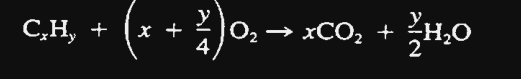

In [63]:
#Aire seco teoricamente requerido
def aireSecoCombustion(X,Y):
    """La cantidad de aire seco teóricamente requerido para la reacción dada en la ecuación
    X y Y provienen de 
    CxHy + (x+y/4)O2 -> xCO2+y/2*H2O"""
    T,x,y=sympy.symbols("T x y",real=True)
    eq=sympy.Eq(T,(x+y/4)/0.2095)
    eq=eq.subs(x,X).subs(y,Y)
    sol=sympy.solve(eq)[0]
    return sol

In [64]:
def excesoAire(porcExceso=None,suministradaReal=None,suministradaTeorica=None):
    """La función despejará y entregará el valor de la variable que no sea dada, puede ser el porcentaje de exceso
    Los moles suministrados reales o los moles suministrados teoricos
    Los moles deben ser ingresados en valores numericos. PE. porcExceso = 40 para 40%
    %excAire=(s-r)/r*100
    porcExceso --> %excAire
    suministradaReal --> s   -->moles
    suministradaTeorica --> r ->moles
    Deben haber 2 parametros para que el tercero que no se ingresó sea el despejado y entregado por la función
    sino se ingresa ningun parametro se imprime en la pantalla la ecuación seguida"""
    XAS, S, R=sympy.symbols("X_as S R'",real=True)
    eq=sympy.Eq(XAS,(S-R)/R*100)
    if porcExceso==None and suministradaReal==None and suministradaTeorica==None:
        return eq
    eq=eq.subs(XAS,porcExceso).subs(S,suministradaReal).subs(R,suministradaTeorica)
    sol=sympy.solve(eq)[0]
    
        
    return sol
    

In [65]:
#Reacción general
def reaccionGeneral(X,Y=None,porcExcAire=None):
    """Si es alcano entonces solamente meter el valor de X, si no lo es entonces meter el valor de Y también
    Escribir el porcentaje de exceso de aire. PE porcExcAire=40 sería para 40%"""
    x=X
    y=Y
    if Y is None:
        y=2*x+2
    if Y is not None:
        y=Y
    aireSecoCombustible=round(float(aireSecoCombustion(x,y)),ndigits=4)
    if porcExcAire is not None:
        aireSecoCombustible=round(excesoAire(porcExceso=porcExcAire,suministradaTeorica=aireSecoCombustible),ndigits=4)
        print(aireSecoCombustible)
    s1="C"
    s2="H"
    s3=" O2"
    s4=" CO2"
    s5=" H2O"
    S1="La reacción general es"
    S2="La reacción con aire seco es"
    s6=str(aireSecoCombustible)+" AS"
    CnHm=s1+str(x)+s2+str(y)
    print(S1)
    print(s1+str(x)+s2+str(y)+" + "+str(round(x+y/4,ndigits=1))+s3+" --> "+str(x)+s4+" + "+str(round(y/2,ndigits=1))+s5)
    
    print(S2)
    
    print(CnHm+" + "+s6+" --> "+str(x)+s4+" + "+str(round(y/2,ndigits=1))+s5+" + "+s6 +str(round(-(x+y/4),ndigits=1))+s3)
    
    #Valor de moles reacción general
    molCnHm=1
    molO2=-round(x+y/4,ndigits=1)
    molCO2=x
    molH2O=round(y/2,ndigits=1)
    #Valor de mol aire seco
    molAireSeco=aireSecoCombustible
    print("\n\nLos moles para la reacción con aire seco")
    print("")
    print(CnHm+"\t"+str(molCnHm))
    print(s3+"\t"+str(molO2))
    print(s4+"\t"+str(molCO2))
    print(s5+"\t"+str(molH2O))
    print("Aire"+"\t"+str(molAireSeco))
    

In [66]:
#Tener los datos de la tabla de excel
tablaCompuestosExcel=pd.ExcelFile("Tablasdecompuestos.xlsx")
CO2_SI=pd.read_excel(tablaCompuestosExcel,sheet_name=0)
CO2_ING=pd.read_excel(tablaCompuestosExcel,sheet_name=1)
H2O_SI=pd.read_excel(tablaCompuestosExcel,sheet_name=2)
H2O_ING=pd.read_excel(tablaCompuestosExcel,sheet_name=3)
CAL_FORM=pd.read_excel(tablaCompuestosExcel,sheet_name=4)
O2_ING=pd.read_excel(tablaCompuestosExcel,sheet_name=5)
O2_SI=pd.read_excel(tablaCompuestosExcel,sheet_name=6)
TABLA_K=pd.read_excel(tablaCompuestosExcel,sheet_name=7) # UTIL EN TURBINAS DE GAS PARA LA PROPULSIÓN DE AERONAVES
ISA_ING=pd.read_excel(tablaCompuestosExcel,sheet_name=8) # UTIL EN TURBINAS DE GAS PARA LA PROPULSIÓN DE AERONAVES
ISA_SI=pd.read_excel(tablaCompuestosExcel,sheet_name=9) # UTIL EN TURBINAS DE GAS PARA LA PROPULSIÓN DE AERONAVES

In [67]:
#CELDA PARA TURBINAS DE GAS PARA LA PROPULSIÓN DE AERONAVES
kTablaSI=TABLA_K.set_index("Temperatura (K)").drop(["Temperatura (R)","k(R) "],axis=1).dropna()
kTablaING=TABLA_K.set_index("Temperatura (R)").drop(["Temperatura (K)", "k(K)"],axis=1).dropna()
altitudTablaING=ISA_ING.set_index("Altitud(ft)")
altitudTablaSI=ISA_SI.set_index("Altitud(m)")

In [68]:
kTablaING

,k(R)
Temperatura (R),
400,1.400
500,1.400
600,1.399
700,1.396
800,1.392
900,1.386
1000,1.381
1100,1.374
1200,1.368


In [69]:
#Tabla de los compuestos para 25°C con índice en la formula
compuestosTabla=CAL_FORM.set_index("Formula") 
compuestosTabla

,Compuesto,Btu/mol,J/mol,Peso de la formula,Estado,Cp(kJ/kmol*K),Cp(Btu/lbmol*R),k
Formula,,,,,,,,
AR,Argón,0,0,39.9480,Gas,20.786,4.968,1.666
C,Carbono (grafito),0,0,12.0112,Sólido,NaN,NaN,NaN
CO,Monóxido de carbono,-47517,-110525,28.0106,Gas,29.143,6.695,1.399
CO2,Bióxido de carbono,-169179,-393510,44.0100,Gas,37.128,8.874,1.288
CH4,Metano,-32162,-74809,16.0430,Gas,NaN,NaN,NaN
C2H6,Etano,-36408,-84685,32.0701,Gas,NaN,NaN,NaN
C3H8,Propano,-44647,-103849,44.0976,Gas,NaN,NaN,NaN
C4H10,n-butano,-63480,-147655,58.1248,Líquido,NaN,NaN,NaN
C7H16,n-heptano,-96471,-224392,100.2064,Líquido,NaN,NaN,NaN


In [70]:
#Tabla para el O2
oxigenoTablaING=O2_ING.set_index("Temperatura (R)")
oxigenoTablaSI=O2_SI.set_index("Temperatura (K)")
dioxidoCarbonoTablaING=CO2_ING.set_index("Temperatura (R)")
dioxidoCarbonoTablaSI=CO2_SI.set_index("Temperatura (K)")
aguaTablaING=H2O_ING.set_index("Temperatura (R)")
aguaTablaSI=H2O_SI.set_index("Temperatura (K)")

In [71]:
aguaTablaSI

,Cp (kJ/kmol*K),h (kJ/kmol),s (kJ/kmol*K),g (kJ/kmol),Pr
Temperatura (K),,,,,
298.15,33.577,-241816.1,188.713,-298080.8,0.7199
300.00,33.586,-241753.9,188.921,-298430.1,0.7382
350.00,33.884,-240067.5,194.119,-308009.2,1.3794
400.00,34.263,-238364.2,198.668,-317831.2,2.3840
450.00,34.706,-236640.2,202.728,-327867.9,3.8850
500.00,35.200,-234892.7,206.410,-338097.8,6.0490
550.00,35.734,-233119.5,209.790,-348503.9,9.0830
600.00,36.297,-231318.8,212.923,-359072.6,13.2400
650.00,36.881,-229489.4,215.851,-369792.8,18.8300


In [72]:
aguaTablaSI.loc[305]=np.NaN
aguaTablaSI.sort_index()
#aguaTablaSI.drop(305)
#aguaTablaSI
aguaTablaSI.interpolate(method='index',inplace=True)
aguaTablaSI.sort_index()
aguaTablaSI.drop(305,inplace=True)
aguaTablaSI

,Cp (kJ/kmol*K),h (kJ/kmol),s (kJ/kmol*K),g (kJ/kmol),Pr
Temperatura (K),,,,,
298.15,33.577,-241816.1,188.713,-298080.8,0.7199
300.00,33.586,-241753.9,188.921,-298430.1,0.7382
350.00,33.884,-240067.5,194.119,-308009.2,1.3794
400.00,34.263,-238364.2,198.668,-317831.2,2.3840
450.00,34.706,-236640.2,202.728,-327867.9,3.8850
500.00,35.200,-234892.7,206.410,-338097.8,6.0490
550.00,35.734,-233119.5,209.790,-348503.9,9.0830
600.00,36.297,-231318.8,212.923,-359072.6,13.2400
650.00,36.881,-229489.4,215.851,-369792.8,18.8300


In [73]:
aguaTablaING.index[-1]

In [74]:
#Función para interpolar o no si es que existe una indice
def interpolarTablas(tabla,indice):
    """Tabla se tiene que agregar el dataframe al cual se le agregará un valor
    indice es el valor del indice"""
    if indice in tabla.index:
        return
#     if indice <= tabla.index[0]: #Menor que el primero
#         tabla.loc[indice]=np.NaN
#         tabla.sort_index(inplace=True)
#         tabla.interpolate(method="spline",order = 1,inplace=True, limit_direction="both", fill_value="extrapolate")
#     if indice >= tabla.index[-1]: #Mayor que el ultimo
#         tabla.loc[indice]=np.NaN
#         tabla.sort_index(inplace=True)
#         tabla.interpolate(method="slinear",order = 1,inplace=True, fill_value="extrapolate", limit_direction="both")
        #         raise Exception("Escoger un indice(temperatura, altitud, etc) que no sea menor que el primer valor de indice ni mayor a este")
    if indice not in tabla.index: #Crear valor en el index
        tabla.loc[indice]=np.NaN
        tabla.sort_index(inplace=True)
        tabla.interpolate(method="slinear",inplace=True, limit_direction="both")
        tabla.interpolate(method="slinear",inplace=True, fill_value="extrapolate", limit_direction="both")

In [191]:
def interpolarTablasCuad(tabla, indice):
    """Tabla se tiene que agregar el dataframe al cual se le agregará un valor
    índice es el valor del indice
    Util para metodo cuadratico"""
    if indice in tabla.index:
        return
    if indice <= tabla.index[0]: #Menor que el primero
        tabla.loc[indice]=np.NaN
        tabla.sort_index(inplace=True)
        tabla.interpolate(method="cubic",inplace=True, limit_direction="both", fill_value="extrapolate")
    if indice not in tabla.index: #Crear valor en el index
        tabla.loc[indice]=np.NaN
        tabla.sort_index(inplace=True)
        tabla.interpolate(method="quadratic",inplace=True, limit_direction="both")
        tabla.interpolate(method="quadratic",inplace=True, limit_direction="both", fill_value="extrapolate")

In [193]:
# kTablaING.drop(100,inplace=True)
# interpolarTablasCuad(kTablaING,398)
# kTablaING

,k(R)
Temperatura (R),
100.0,1.411973
398.0,1.400014
400.0,1.400000
500.0,1.400000
600.0,1.399000
700.0,1.396000
800.0,1.392000
900.0,1.386000
1000.0,1.381000


In [172]:
#Función para obtener la entalpia de alguna molecula mediante su temperatura
def moleculaEntalpia(molecula,temperatura,u):
    """Ingresando el valor de la molecula, su temperatura y unidades 
    se puede conseguir su entalpia
    molecula = 'butano','heptano','octano', 'O2', 'CO2', 'H2O', "Aire seco"
    se pueden ingresar valores numericos para estas moleculas
    molecula --> 'metano' = 1 = 'CH4'
    molecula --> 'etano' = 2 = 'C2H6'
    molecula --> 'propano' = 3 = 'C3H8'
    molecula --> 'butano' = 4 = 'C4H10'
    molecula --> 'heptano' = 7 = 'C7H16'
    molecula --> 'octano' = 8 = 'C8H18'
    molecula --> 'O2' 
    molecula --> 'CO2'
    molecula --> 'H2O'
    molecula --> 'Aire seco
    
    NOTA: Con alcanos siempre se usará la temperatura de 25°C=298K=537R aunque haya alguna ya puesta
    'u' es para indicar la unidad que tendrá, si serán inglesas o sistema internacional (SI)
    u = 0 = 'SI'  --> unidades SI. °K,J,mol*kg
    u = 1 = 'ING' --> unidades ING. °R,Btu,mol*lb
    """
    U=u
    if type(molecula) is str:
        molecula=molecula.upper()
    if type(U) is str:
        U=U.upper()
    if U == 0 or U == "SI":
        U="J/mol"
    if U == 1 or U == "ING":
        U="Btu/mol"
    butano=1
    heptano=2
    octano=3
    if (molecula == "BUTANO") or (molecula == 4) or (molecula == "C4H10"):
        return compuestosTabla.loc["C4H10",U]
    if (molecula == "HEPTANO") or molecula == 7 or molecula == "C7H16":
        return compuestosTabla.loc["C7H16",U]
    if molecula == ("OCTANO") or molecula == 8 or molecula == "C8H18":
        return compuestosTabla.loc["C8H18",U]
    if molecula == "METANO" or molecula == 1 or molecula == "CH4" or molecula == "C1H4":
        return compuestosTabla.loc["CH4",U]
    if molecula == 'ETANO' or molecula == 2 or molecula == "C2H6":
        return compuestosTabla.loc["C2H6",U]
    if molecula == "PROPANO" or molecula == 3 or molecula == "C3H8":
        return compuestosTabla.loc["C3H8",U]
    if u == 0 or U=="SI":
        U="h (kJ/kmol)"
    if u == 1 or U =="ING":
        U="h (Btu/mol)"
    if molecula == ("O2") and U == "h (kJ/kmol)" :#SI
        interpolarTablas(oxigenoTablaSI,temperatura)
        return oxigenoTablaSI.loc[temperatura,U]
    if molecula == ("CO2") and U == "h (kJ/kmol)":#SI
        interpolarTablas(dioxidoCarbonoTablaSI,temperatura)
        return  dioxidoCarbonoTablaSI.loc[temperatura,U]
    if molecula == ("H2O") and U == "h (kJ/kmol)":#SI
        interpolarTablas(aguaTablaSI,temperatura)
        return aguaTablaSI.loc[temperatura,U]
    if molecula == ("AIRE SECO") and U == "h (kJ/kmol)":#SI
        interpolarTablas(aireSIt,temperatura)
        return aireSIt.loc[temperatura,"h(kJ/kmol)"]
    
    if molecula == ("O2") and U == "h (Btu/mol)": #ING
        interpolarTablas(oxigenoTablaING,temperatura)
        return oxigenoTablaING.loc[temperatura,U]
    if molecula == ("CO2") and U == "h (Btu/mol)": #ING
        interpolarTablas(dioxidoCarbonoTablaING,temperatura)
        return dioxidoCarbonoTablaING.loc[temperatura,U]
    if molecula == ("H2O") and U == "h (Btu/mol)": #ING
        interpolarTablas(aguaTablaING,temperatura)
        return aguaTablaING.loc[temperatura,U]
    if molecula == ("AIRE SECO") and U == "h (Btu/mol)":#ING
        interpolarTablas(aireINGt,temperatura)
        return aireINGt.loc[temperatura,"h(Btu/mol)"]
    
    raise Exception("Algo salió mal")

In [78]:
moleculaEntalpia("aire seco",537,1)

In [79]:
moleculaEntalpia(molecula="C8H18",temperatura=298.15,u=0) #SI

-249957

In [80]:
#Ecuación de temperatura adiabatica de la llama a presión constante
def ecTempAd():
    Q,Hpr,Hre=sympy.symbols("Q H_pr H_re",real=True)
    eq=sympy.Eq(0,Hpr-Hre)
    

In [81]:
#Función que regresa el valor de la temperatura después de iteraciones
def temperaturaEntalpiaIteraciones(X,temperatura,entalpiaForm,u,tol,porcExcesoAire=0):
    """Mediante iteraciones se consigue una temperatura
    
    X --> Si X=8 se tendrá un octano de C8H18
          Si X=1 se tendrá un metano de CH4 y demás 
          
    temperatura --> Valor de temperatura, dependiente del argumento u
    para sus unidades
    
    entalpiaForm --> el valor de la entalpia en la formación
    
    u --> Unidades
    u = 0 -->(SI)
    u = 1 -->(INGLES)
    
    tol --> Tolerancia
    tol = 1e-9 
    tol = 0.000001
    
    porcExcesoAire --> Porcentaje de exceso de aire
    por defecto tiene un porcentaje de 0
    si el porcentaje es de %150 entonces
    porcExcesoAire=1.5
    """
    
    if u==0: #SI
        a=300 #K
        b=2500 #K
    if u==1: #INGLES
        a=600 #R
        b=4500 #R
    
    t=0 #Valor medio
    it=0 #N° de iteración
    
    if f(a)*f(b)>0:
        raise Exception("Los valores no funcionaran para temperatura")
    while True:
        t=(a+b)/2
        if f(t)<0:
            a=t
        if f(t)>0:
            b=t
        
        if np.abs(f(t)) < tol:
            break
        if it > 1000:
            raise Exception("Se han hecho más de 1000 iteraciones y no se ha logrado conseguir el valor tolerado")
        it=it+1
    return t
    

In [82]:
#Función para regresar el valor de la raíz de una función
def raizFuncion(f,tol,u,a=None,b=None):
    """"""
    it=0 #Iteración
    if u==0 and (a is None) and (b is None): #SI
        a=300 #K
        b=2500 #K
    if u==1 and (a is None) and (b is None): #INGLES
        a=600 #R
        b=4500 #R
    t=0 #Raíz
    
    if f(a)*f(b) > 0:
        raise Exception("La función se mantiene con el mismo signo en los extremos de la temperatura")
    while True:
        t=(a+b)/2
        if f(t)<0:
            a=t
        
        if f(t)==0:
            break
        
        if f(t)>0:
            b=t
        
        if it == 1000:
            raise Exception("Se han logrado las 1000 iteraciones y no se ha llegado al resultado")
        
        if abs(f(t)) < tol:
            print(f(t))
            break
        
        it=it+1
    print("N° de iteraciones: "+str(it))
    return t

In [83]:
#Función de relación combustible aire
def relCombustibleAire(relCA=None,C=None,A=None,CM=None,AM=None):
    """La relación combustible-aire (f/a) se define como la masa de combustible sumi-
    nistrada a un proceso de combustión, dividida entre la masa de aire suministrado a
    un proceso de combustión, ambos sobre una base consistente, o en forma de ecuación
    f'=f/a=combustible/aire=masa de combustible suministrado/masa de aire suministrado
    f'=relCA=f/a=C/A
    CM y AM son las masas/mol del combustible y aire respectivamente
    
    Con esta función se puede realizar un despeje del valor que no sea ingresado
    Al menos deben haber 2 parametros ingresados en la función para su correcto
    funcionamiento
    Si no se ingresa ningún valor de parametro entonces sólo se imprimirá la ecuación
    """
    relca, c, a, cm, am=sympy.symbols("f' f a cm am",real=True)
    eq=sympy.Eq(relca,c*cm/(a*am))
    if relCA == None and C == None and A == None and CM ==None and AM == None:
        return eq
    eq=eq.subs(relca,relCA).subs(c,C).subs(a,A).subs(cm,CM).subs(am,AM)
    val=sympy.solve(eq)[0]
    return val

In [84]:
def relCombustibleAireGases(relCA = None, C = None, CM = None, AM = None):
    """Lo mismo que relCombustibleAire, pero al agregar el gas ya se incluye su peso
    molecular
    CM --> masa ó moles del combustible
    AM --> masa ó moles del aire
    
    C es el combustible, la lista es:
    "Metano" -- "CH4 --- 1"
    "Etano" --- "C2H6 -- 2"
    "Propano" - "C3H8 -- 3"
    "Butano" -- "C4H10 - 4"
    "Heptano" - "C7H16 - 7"
    "Octano" -- "C8H18 - 8"
    Con esto se obtiene el peso molecular
    """
    s = "Peso de la formula"
    if type(C) is str:
        C = C.upper()
        
    if C == "METANO" or C == "CH4" or C == 1:
        c = compuestosTabla.loc["CH4",s]
    if C == "ETANO" or C == "C2H6" or C == 2:
        c = compuestosTabla.loc["C2H6",s]
    if C == "PROPANO" or C == "C3H8" or C == 3:
        c = compuestosTabla.loc["C3H8",s]
    if C == "BUTANO" or C == "C4H10" or C == 4:
        c = compuestosTabla.loc["C4H10",s]
    if C == "HEPTANO" or C == "C7H16" or C == 7:
        c = compuestosTabla.loc["C7H16",s]
    if C == "OCTANO" or C == "C8H18" or C == 8:
        c = compuestosTabla.loc["C8H18",s]
    
    return float(relCombustibleAire(relCA=relCA,C=c,A=aireSecoMol,CM=CM,AM=AM))

In [85]:
def pesoCombustible(C):
    """C es el combustible, la lista es:
    "Metano" -- "CH4 --- 1"
    "Etano" --- "C2H6 -- 2"
    "Propano" - "C3H8 -- 3"
    "Butano" -- "C4H10 - 4"
    "Heptano" - "C7H16 - 7"
    "Octano" -- "C8H18 - 8"
    Con esto se obtiene el peso molecular"""
    s = "Peso de la formula"
    if C == "METANO" or C == "CH4" or C == 1:
        c = compuestosTabla.loc["CH4",s]
        return c
    if C == "ETANO" or C == "C2H6" or C == 2:
        c = compuestosTabla.loc["C2H6",s]
        return c
    if C == "PROPANO" or C == "C3H8" or C == 3:
        c = compuestosTabla.loc["C3H8",s]
        return c
    if C == "BUTANO" or C == "C4H10" or C == 4:
        c = compuestosTabla.loc["C4H10",s]
        return c
    if C == "HEPTANO" or C == "C7H16" or C == 7:
        c = compuestosTabla.loc["C7H16",s]
        return c
    if C == "OCTANO" or C == "C8H18" or C == 8:
        c = compuestosTabla.loc["C8H18",s]
        return c
    
    raise Exception("Ingresar un valor de C valido")

In [86]:
def porcAireTeorico(pAT=None,pEA=None):
    """El porcentaje teórico de aire es igual al porcentaje de exceso de aire + 100
    %aire teórico= %exceso de aire+100
    pAT=pEA+100
    pAT --> %aire teórico
    pEA --> %exceso de aire"""
    pat, pea=sympy.symbols("%at %ea")
    eq=sympy.Eq(pat,pea+100)
    eq=eq.subs(pat,pAT).subs(pea,pEA)
    val=sympy.solve(eq)[0]
    return val
    

In [87]:
def tablaComposicionSalida(mCO2,mH2O,mAS,mO2):
    """Crea una tabla con los valores de salida
    de la cámara de combustión para la composición
    
    Los parametros mCO2,mH2O,mAS,mO2 son los moles respectivos
    
    P.E tablaComposicionSalida(8,9,202.37,-12.5)"""
    columnas=["ni","Mi","ni*Mi"]
    indice=["CO2","H2O","AS", "O2"]
    masas={"Mi":[44.01,18.02,28.97,32],"ni":[mCO2,mH2O,mAS,mO2]}
    df=pd.DataFrame(index=indice, columns=columnas,data=masas)
    df["ni*Mi"]=df["ni"]*df["Mi"]
    df.loc["Suma"]=df.sum()
    return df

In [88]:
def tablaComposicionEntrada(xAlcano,mAS,mAlcano):
    """Crea una tabla con los valores de la entrada de la cámara
    de combustión
    
    xAlcano --> El valor x del hidrocarburo alcano
    mAS     --> mol de aire seco
    mAlcano --> mol de alcano
    PE. tablaComposicionEntrada(8,59.666,1)"""
    X=xAlcano
    Y=2*X+2
    alcano="C{}H{}".format(str(X),str(Y))
    if X == 1:
        pA=16.0430
    if X == 2:
        pA=32.0701
    if X == 3:
        pA=44.0976
    if X == 4:
        pA=58.1248
    if X == 7:
        pA=100.2064
    if X == 8:
        pA=114.2336
    columnas=["ni","Mi","ni*Mi"]
    indice=[alcano,"AS"]
    masas={"Mi":[pA,28.97],"ni":[mAlcano, mAS]}
    df=pd.DataFrame(index=indice, columns=columnas, data=masas)
    df["ni*Mi"]=df["ni"]*df["Mi"]
    df.loc["Suma"]=df.sum()
    return df

# FIN DE COMBUSTIÓN -------------------------------------------------------------------------------

# CICLO BÁSICO (MEDIO REAL)

In [89]:
def moleculaEntropia (molecula,temperatura,u):
    """Ingresando el valor de la molecula, su temperatura y unidades 
    se puede conseguir su entropia
    molecula = 'O2', 'CO2', 'H2O', "Aire seco"
    se pueden ingresar valores numericos para estas moleculas
    molecula --> 'O2' 
    molecula --> 'CO2' 
    molecula --> 'H2O' 
    molecula --> 'Aire seco'
    u = 0 = 'SI'  --> unidades SI. °K,J,mol*kg
    u = 1 = 'ING' --> unidades ING. °R,Btu,mol*lb
    (NO USAR NUMEROS EN molecula NI u POR EL MOMENTO)
    """
    entalpia=moleculaEntalpia(molecula,temperatura,u)
    
    if type(molecula) is str:
        molecula=molecula.upper()
    if type(u) is str:
        u=u.upper()
        
    #Con la entalpia poder sacar la entropia
    if u == 0 or u == "SI":
        U="s (kJ/kmol*K)"
        H="h (kJ/kmol)"
        
        if molecula == "O2" or molecula == 4:
            return oxigenoTablaSI.reset_index().set_index(H).loc[entalpia, U]
        if molecula == "CO2" or molecula == 5:
            return dioxidoCarbonoTablaSI.reset_index().set_index(H).loc[entalpia, U]
        if molecula == "H2O" or molecula == 6:
            return aguaTablaSI.reset_index().set_index(H).loc[entalpia,U]
        if molecula == "AIRE SECO" or molecula == 7:
            return aireSIt.reset_index().set_index("h(kJ/kmol)").loc[entalpia,"s(kJ/kmol*K)"]
        
    if u == 1 or u == "ING":
        U="s (Btu/mol*R)"
        H="h (Btu/mol)"
        
        if molecula == "O2" or molecula == 4:
            return oxigenoTablaING.reset_index().set_index(H).loc[entalpia, U]
        if molecula == "CO2" or molecula == 5:
            return dioxidoCarbonoTablaING.reset_index().set_index(H).loc[entalpia, U]
        if molecula == "H2O" or molecula == 6:
            return aguaTablaING.reset_index().set_index(H).loc[entalpia,U]
        if molecula == "AIRE SECO" or molecula == 7:
            return aireINGt.reset_index().set_index("h(Btu/mol)").loc[entalpia,"s(Btu/mol*R)"]
        
    raise Exception("No se cumplieron las condiciones de los parametros")


In [90]:
def ecuacionIsentropica(u, s3 = None, s4i = None,  p3 = None, p4 = None,molPr = None):
    """la expansión isentrópica en la turbina del generador del gas, permite despejar cualquier valor que no sea ingresado
    Solamente un parametro debe mantenerse sin ingresar para que el despeje sea correcto
    
    Para base molar
    0 = ~s4i-~s3-~R*ln(p4/p3)
    
    Con moles de productos
    0 = S4i-S3-~R*npr*ln(p4/p3)
    
    
    u = 0      --> SI
    u = 1      --> ING
    molPr = npr -> moles del producto
    p3, p4 --> Presion 3 y 4 respectivamente
    
    S4i = ~s4i*n
    S3 = ~s3*n
    n [=] n° moles
    
    Con u = 0:
    ~s4i, ~s3 [=] kJ/kmol*K
    S4i, S3 [=] kJ/K
    ~R = 8.31434 * 10^3 J/(mol*K)
    
    Con u = 1:
    ~s4i, ~s3 [=] Btu/mol*R
    S4i, S3 [=] Btu/R
    ~R = 1.98718 Btu/(mol*R)
    
    s4i --> la entalpia 4 imaginaria de todos los productos
    s3 ---> la entalpia 3 de todos los productos
    p3 ---> la presión 3
    p4 ---> la presión 4
    molPr > moles de los productos de la reacción
    u ----> unidades
    """
    if u == 0: #SI
        r=8.31434 #J/mol*K
    if u == 1: #ING
        r=1.98718 #Btu/mol*R
    S4I,S3,R,N,P4,P3=sympy.symbols("S_4i S_3 R n_pr p4 p3",real=True)
    if molPr is not None:
        
        if (s3 is None) or (s4i is None):
            
            eq = sympy.Eq(S4I-S3-R*N*sympy.ln(P4/P3),0)
            eq = eq.subs(S4I,s4i).subs(S3,s3).subs(R,r).subs(N,molPr).subs(P3,p3).subs(P4,p4)
            return sympy.solve(eq)[0]
        
        if (p3 is None) or (p4 is None):
            
            eq = sympy.Eq(P4/P3,sympy.exp((S4I-S3)/(R*N)))
            eq = eq.subs(S4I,s4i).subs(S3,s3).subs(R,r).subs(N,molPr).subs(P3,p3).subs(P4,p4)
            return sympy.solve(eq)[0]
            
    raise Exception("Rellenar los parametros necesarios")

In [91]:
def expansionIsentropica34i(u, s3 = None, s4i = None,  p3 = None, p4 = None,molPr = None):
    """la expansión isentrópica en la turbina del generador del gas, permite despejar cualquier valor que no sea ingresado
    Solamente un parametro debe mantenerse sin ingresar para que el despeje sea correcto
    
    Para base molar
    0 = ~s4i-~s3-~R*ln(p4/p3)
    
    Con moles de productos
    0 = S4i-S3-~R*npr*ln(p4/p3)

    
    u = 0      --> SI
    u = 1      --> ING
    molPr = npr -> moles del producto
    p3, p4 --> Presion 3 y 4 respectivamente
    
    S4i = ~s4i*n
    S3 = ~s3*n
    n [=] n° moles
    
    Con u = 0:
    ~s4i, ~s3 [=] kJ/kmol*K
    S4i, S3 [=] kJ/K
    ~R = 8.31434 * 10^3 J/(mol*K)
    
    Con u = 1:
    ~s4i, ~s3 [=] Btu/mol*R
    S4i, S3 [=] Btu/R
    ~R = 1.98718 Btu/(mol*R)
    
    s4i --> la entalpia 4 imaginaria de todos los productos
    s3 ---> la entalpia 3 de todos los productos
    p3 ---> la presión 3
    p4 ---> la presión 4
    molPr > moles de los productos de la reacción
    u ----> unidades
    """
    return ecuacionIsentropica(u=u,s3=s3,s4i=s4i,p3=p3,p4=p4,molPr=molPr)

In [92]:
def expansionIsentropica45i(u, s4a = None, s5i = None,  p4 = None, p5 = None,molPr = None):
    """Más información en expansionIsentropica34i
    
    Con moles de productos
    0 = S5i-S4r-~R*npr*ln(p5/p4)
    
    """
    return ecuacionIsentropica(u=u,s3=s4a,s4i=s5i,p3=p4,p4=p5,molPr=molPr)

# FIN DE CICLO BÁSICO (MEDIO REAL)

# TURBINA DE GAS CON REGENERADOR

In [93]:
def eficienciaRegenerador(eficienciaReg, H2A=None, H5A=None, H25=None):
    """Se usa la formula
    nreg=(h2.5-h2a)/(h5a-h2a)
    El valor que no sea ingresado en los parametros será el despejado de la formula
    """
    h25,h2a,h5a,nr = sympy.symbols("h_25 h_2a h_5a n_reg",real=True)
    eq=sympy.Eq(nr,(h25-h2a)/(h5a-h2a))
    eq=eq.subs(h25,H25).subs(h2a,H2A).subs(h5a,H5A).subs(nr,eficienciaReg)
    return sympy.solve(eq)[0]

In [94]:
def formulasRegenerador():
    h25,h2a,h5a,nr,qent,h3 = sympy.symbols("h_25 h_2a h_5a n_reg q_ent h_3",real=True)
    LEC,f,conv,conv2,wn, nt, ent=sympy.symbols("LEC f' 2545 28.965 w_neto n_t Delta_Hcomb",real=True)
    eq=sympy.Eq(nr,(h25-h2a)/(h5a-h2a))
    eq2=sympy.Eq(qent,h3-h25)
    eq3=sympy.Eq(LEC,conv/(nt*ent))
    
    return list([eq,eq2,eq3])

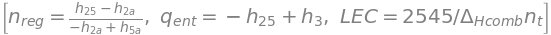

In [95]:
formulasRegenerador()

# FIN DE TURBINA DE GAS CON REGENERADOR

# Mecanica de fluidos

In [96]:
# compuestosTabla

In [97]:
def valoresCompuestos(c,u):
    """
    c -> Compuesto
    c --> "Ar"
    c --> "CO"
    c --> "CO2"
    c --> "H2"
    c --> "H2O"
    c --> "N2"
    c --> "O2"
    
    u -> Unidades
    u --> 0 --> SI 
    u --> 1 --> ING
    Este regresa 5 valores en total
    Peso molar, Cp[mol], Cp[lb/kg], k
    """
    if type(c) is not str:
       raise Exception("Ingresa un valor de compuesto correcto")
    c = c.upper()
    
    if u == 0:
        cptext = "Cp(kJ/kmol*K)"
    if u == 1:
        cptext = "Cp(Btu/lbmol*R)"
    
    M = compuestosTabla.loc[c,"Peso de la formula"]
    Cpmol=compuestosTabla.loc[c,cptext]
    Cp = Cpmol/M
    k = compuestosTabla.loc[c,"k"]
    
    return M, Cpmol, Cp, k

In [98]:
def verificarEstancado(pd,pahogamiento,tent,k, p1, cp,u):
    """
    pd -> Presión de descarga (presión después de garganta)
    pahogamiento -> Presión de estancamiento
    tent -> Temperatura de entrada
    k -> Valor k
    u -> Unidades
    u --> 0 -> SI
    u --> 1 -> INGLES
    p1 -> Presión de entrada
    cp -> Cp[kg/lb] NO USAR MOLAR
    """
    if u == 0:
        gc = 1
        R = 8.31e3 #J/(molkg*K)
    if u == 1:
        gc = 32.174
        R = 35.133
        
    if pd <= pahogamiento:
        print("Estancado\nLos valores entregados son")
        print("Pth, Tth, Vth")
        
        pth = pahogamiento
        tth = tent*(2/(k+1))
        vth = float(sympy.sqrt(k*gc*R*tth))
        return pth,tth,vth
    
    if pd > pahogamiento:
        print("No estancado\nLos valores entregados son")
        print("Pth, Tth, Vth")
        
        pth = pd
        tth = tent*(pth/p1)**((k-1)/k)
        vth = sympy.sqrt(2*cp*(tent-tth)*25037)
        return pth,tth,vth
    
    raise Exception("Algo sucedió")

# Mecanica de fluidos FIN

# TURBINAS DE GAS PARA LA PROPULSIÓN DE AVIONES

In [99]:
def ISApropiedades(u,a=None, t=None, p=None):
    """
    u -> unidades
    u --> 0 -> SI
    u --> 1 -> ING
    a -> altura
    a --> (m)
    a --> (ft)
    t -> temperatura
    t --> (K)
    t --> (R)
    p -> presión
    p --> (kPa)
    p --> (psi)
    Una vez puestas las unidades, con ingresar un valor se conseguiran los otros 2
    Si:
    a tiene valor regresará temperatura y presión
    t tiene valor regresará altura y presión
    p tiene valor regresará altura y temperatura
    """
    U=u
    if U == 0:
        u = altitudTablaSI
        temperaturaStr = "Temperatura (K)"
        presionStr = "Presión (kpa)"
        altitudStr = "Altitud(m)"
    if U == 1:
        u = altitudTablaING
        temperaturaStr = "Temperatura (R)"
        presionStr = "Presión (psi)"
        altitudStr = "Altitud(ft)"
    
    if a is not None:
        interpolarTablas(u,a)
        T=u.loc[a,temperaturaStr]
        P=u.loc[a,presionStr]
        return T,P
    
    if t is not None:
        u = u.reset_index().set_index(temperaturaStr)
        interpolarTablas(u,t)
        A=u.loc[t,altitudStr]
        P=u.loc[t,presionStr]
        return A,P
    
    if p is not None:
        u = u.reset_index().set_index(presionStr)
        interpolarTablas(u,p)
        A=u.loc[p,altitudStr]
        T=u.loc[p,temperaturaStr]
        return A,T

In [100]:
def valorK (u,T):
    """
    u --> Unidades
    u -> 0 -> SI
    u -> 1 -> ING
    
    T --> Temperatura
    T -> °R -> ING
    T -> °K -> SI"""
    if u == 0:
        interpolarTablasCuad(kTablaSI,T)
        return kTablaSI.loc[T,"k(K)"]
    if u == 1:
        interpolarTablasCuad(kTablaING,T)
        return kTablaING.loc[T,"k(R) "]
    
    raise Exception("Ten congruencia en los valores u y T")

In [101]:
def valoresTablaAire(U,t=None,pr=None,s=None,h=None):
    """Con su respectivo valor se puede conseguir todo lo demás
    Si tiene valor -> Entrega:
    t  -> H,PR,S
    pr -> H,T,S
    s  -> H,T,PR
    h  -> T,PR,S
    
    U -> Unidades
    U --> 0 -> SI
    U --> 1 -> ING
    
    Los valores entregados tienen unidad de masa -> kmol en SI, mol en ING
    """
    if type(U) is not int:
        raise Exception("Ingresa un valor correcto en las unidades")
    rd = 8
    if U == 0: #SI
        hs = "h(kJ/kmol)"
        ts = "Temperatura(K)"
        prs = "Pr"
        ss = "s(kJ/kmol*K)"
        if t is not None:
            tabla = TemperaturaSI(t).loc[t]
            H = round(tabla.loc[hs],rd)
            S = round(tabla.loc[ss],rd)
            PR = round(tabla.loc[prs],rd)
            print(H,hs,"|",PR,prs,"|",S,ss)
            return H,PR,S
        if pr is not None:
            tabla = PresionRelSI(pr).loc[pr]
            T = round(tabla.loc[ts],rd)
            H = round(tabla.loc[hs],rd)
            S = round(tabla.loc[ss],rd)
            print(H,hs,"|",T,ts,"|",S,ss)
            return H,T,S
        if s is not None:
            tabla = EntropiaSI(s).loc[s]
            H = round(tabla.loc[hs],rd)
            T = round(tabla.loc[ts],rd)
            PR = round(tabla.loc[prs],rd)
            print(H,hs,"|",T,ts,"|",PR,prs)
            return H,T,PR
        if h is not None:
            tabla = EntalpiaSI(h).loc[h]
            T = round(tabla.loc[ts],rd)
            PR = round(tabla.loc[prs],rd)
            S = round(tabla.loc[ss],rd)
            print(T,ts,"|",PR,prs,"|",S,ss)
            return T,PR,S
    if U == 1: #ING    
        hs = "h(Btu/mol)"
        ts = "Temperatura(R)"
        prs = "Pr"
        ss = "s(Btu/mol*R)"
        if t is not None:
            tabla = TemperaturaING(t).loc[t]
            H = round(tabla.loc[hs],rd)
            S = round(tabla.loc[ss],rd)
            PR = round(tabla.loc[prs],rd)
            print(H,hs,"|",PR,prs,"|",S,ss)
            return H,PR,S
        if pr is not None:
            tabla = PresionRelING(pr).loc[pr]
            T = round(tabla.loc[ts],rd)
            H = round(tabla.loc[hs],rd)
            S = round(tabla.loc[ss],rd)
            print(H,hs,"|",T,ts,"|",S,ss)
            return H,T,S
        if s is not None:
            tabla = EntropiaING(s).loc[s]
            H = round(tabla.loc[hs],rd)
            T = round(tabla.loc[ts],rd)
            PR = round(tabla.loc[prs],rd)
            print(H,hs,"|",T,ts,"|",PR,prs)
            return H,T,PR
        if h is not None:
            tabla = EntalpiaING(h).loc[h]
            T = round(tabla.loc[ts],rd)
            PR = round(tabla.loc[prs],rd)
            S = round(tabla.loc[ss],rd)
            print(T,ts,"|",PR,prs,"|",S,ss)
            return T,PR,S
        
    raise Exception("Algun parametro es incorrecto")

# TURBINAS DE GAS PARA LA PROPULSIÓN DE AVIONES FIN

## PRUEBAS (IGNORAR)

In [102]:
# aireSecoCombustion(8,18)

In [103]:
# aireSIt.loc[2630].rename_axis("Temperatura ")

In [104]:
# aireING.iloc[0]
#Localizar mediante enteros del index

In [105]:
# aireINGt.loc[4840]
#Localizar en función de temperatura 

In [106]:
# TR in aireINGt.index()aireINGt.loc[4845]=[np.NaN,np.NaN,np.NaN,np.NaN]
#Se crea una fila con la temperatura 4845 y no tiene valores a mostrar aún
# aireINGt=aireINGt.sort_index()
# #Hace que la posición de la temperatura esté ordenada
# aireINGt.loc[4845]

In [107]:
# aireINGt

In [108]:
# aireINGt.interpolate(method='index')


In [109]:
# aireINGt.loc[4885]=[np.NaN,np.NaN,np.NaN,np.NaN]
# aireINGt

In [110]:
# aireINGt.interpolate(method='index')


In [111]:
# 4847 not in aireINGt.index
# #Condicional de encontrar valor de temperatura en el index

In [112]:
# IndexCercanos(4820,aireINGt)

In [113]:
# #FUNCIÓN VIEJA, NO USAR
# #Definir función que me ayude a encontrar valores termodinámicos en función de su temperatura en Kelvin
# def TemperaturaSI (TK):
#     """Docstring
#     Definir función que me ayude a encontrar valores termodinámicos en función de su temperatura en Kelvin
#     TemperaturaSI(TK)
#     TK = Temperatura en Kelvin"""
#     global aireSIt
#     if TK not in aireSIt.index:
#         aireSIt.loc[TK]=[np.NaN,np.NaN,np.NaN,np.NaN]
#         aireSIt=aireSIt.sort_index()
#         aireSIt=aireSIt.interpolate(method='index')
#     return aireSIt.loc[TK].rename_axis('Temperatura(K)'+'       '+str(TK))

In [114]:
# #FUNCIÓN VIEJA, NO USAR
# #Definir función que me ayude a encontrar valores termodinamicos en función de su temperatura en rankine
# def TemperaturaING (TR):
#     """Docstring
#     Definir función que me ayude a encontrar valores termodinamicos en función de su temperatura en rankine
#     TemperaturaING(TR)
#     TR = Temperatura en Rankine"""
#     global aireINGt  #La variable global aireINGt se declara dentro de la función
#     indexes=IndexCercanos(TR,aireINGt) #Valor para localizar el indice anterior y posterior al valor de temperatura
#     if TR not in aireINGt.index:  #Busca que el valor de temperatura no exista, si existe entonces se salta lo que lleva sangria
#         aireINGt.loc[TR]=[np.NaN,np.NaN,np.NaN,np.NaN] #Se crea una fila con la temperatura TR sin valores
#         aireINGt=aireINGt.sort_index() #Se ordena basandose en su temperatura
#         aireINGt=aireINGt.interpolate(method='index') #Se interpola los valores NaN
#     return aireINGt.iloc[indexes] #.rename_axis('Temperatura(R)'+'       '+str(TR)) #Regresa en pantalla los valores termodinamicos

In [115]:
# aireINGt=aireINGt.drop(3025)

In [116]:
# aireINGt.index.is_monotonic_increasing
# aireINGt.style

In [117]:
# aireINGt.loc[[2820,2840,2860]]

In [118]:
# aireINGt.iloc[208:210]

In [119]:
# aireINGt.index.get_loc(4240.5, method='backfill')

In [120]:
# indexCercanos1=aireINGt.index.get_indexer([4240.5], method='ffill')
# indexCercanos2=aireINGt.index.get_indexer([4240.5], method='bfill')
# indexCercanos=np.append(indexCercanos1,[indexCercanos2,indexCercanos2+1]) #+1 porque cuando el nuevo valor de temperatura se agregue, obtendra el valor de indexCercanos2
# #indexCercanos=np.append(indexCercanos,indexCercanos2)
# indexCercanos
# #aireINGt.iloc[indexCercanos]

In [121]:

# aireING.rename(dictLb,axis=1,copy=False) #Renombrar columnas a masa igual a lb para sistema ingles
# aireSI.rename(dictGr,axis=1,copy=False)

In [122]:
# aireING.set_axis(['Temperatura(R)','Cp(Btu/lb*R)','h(Btu/lb)','s(Btu/lb*R)','Pr'],axis="columns")
# tablasLb=np.array(['Temperatura(R)','Cp(Btu/lb*R)','h(Btu/lb)','s(Btu/lb*R)','Pr'])
# tablasLb
# aireING.columns
# #aireING=aireING.set_axis(tablasLb,axis="columns",copy=False)
# #aireING
# aireSI.columns
# #Formas de asignar valores a columnas
#     #aireSI['Temperatura(K)'] = 1
#     #aireSI.loc[:,'Temperatura(K)']=1
# #aireSI.loc[]
# aireSI.iloc[:,1:4]


In [123]:
# c=20*u.BTU/u.mol/u.rankine
# substancia=1*u.mol
# substancia
# substancia.to("g","chem",mw=28.9647*u("g/mol"))


# substancia*28.9467*u('g/mol')
# c*1/aireSecoMolING
# #aireSecoMolagnitude

In [124]:
# aireINGLb=aireING.copy()
# aireINGLb.columns

In [125]:
# T1,T2,R,P1,P2,K=sympy.symbols('T_1 T_2 r_p P_1 P_2 k',real=True)
# eq1=sympy.Eq(P2/P1,(T2/T1)**(K/(K-1)))
# eq2=sympy.Eq(R,(T2/T1)**(K/(K-1)))


# eq1=eq1.subs(T1,519).subs(P1,1).subs(P2,15.88).subs(K,1.4)
# eq1
# k=sympy.solve(eq1,T2)[0]
# k+1

In [126]:
# relCombustibleAireGases(C = 7, CM = 1, AM = 183.203383950465)

In [127]:
# ecuacionIsentropica(1,10944.3,10549.6,176.4,molPr=188)

In [128]:
# compuestosTabla.loc["CH4"]
#compuestosTabla.loc["CH4","Peso de la formula"]